# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.88'

In [49]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [50]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym50,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model
0,187-1-113-reg1-A--Spectrum--011--Spec.Data 1,103.750510,0.009629,1284.558173,0.009013,301.494602,1284.558173,763.311123,0.926878,3.378029,...,1.083333,1.154696,0.154480,0.006149,1.150649,1.174905,0.199621,0.002162,PseudoVoigtModel,PseudoVoigtModel
1,187-1-113-reg1-A--Spectrum--012--Spec.Data 1_C...,103.731348,0.009085,1284.578803,0.008479,312.828738,1284.578803,799.490060,0.932701,3.634035,...,1.098485,1.172702,0.183714,0.005963,1.111959,1.117537,0.149164,0.002081,PseudoVoigtModel,PseudoVoigtModel
2,187-1-113-reg1-A--Spectrum--013--Spec.Data 1,103.752469,0.009512,1284.579141,0.008883,326.397253,1284.579141,823.425262,0.954087,3.902843,...,1.271457,1.279823,0.517987,0.005846,1.189840,1.186408,0.247346,0.001892,PseudoVoigtModel,PseudoVoigtModel
3,187-1-113-reg1-B--Spectrum--023--Spec.Data 1,103.699687,0.008086,1284.661568,0.007701,464.682206,1284.661568,1153.549677,0.905319,5.022840,...,1.196721,1.217327,0.356191,0.003897,1.129114,1.113553,0.176264,0.001472,PseudoVoigtModel,PseudoVoigtModel
4,187-1-113-reg1-B--Spectrum--024--Spec.Data 1,103.710162,0.007803,1284.661288,0.007433,479.533518,1284.661288,1187.251740,0.905836,4.951129,...,1.166667,1.220414,0.301945,0.003778,1.133508,1.099065,0.175259,0.001354,PseudoVoigtModel,PseudoVoigtModel


## First, get the metadata for this day

In [51]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'FG', 'Cap','window','Video'],
 sort=True)
diad_meta[0]

'001 187-1-113-reg1--000--Information.txt'

## Now get all the important information out of the metadata files

In [52]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 39/39 [00:00<00:00, 1462.54it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-1-113-reg1-A--Spectrum--011--Information.txt,"January 18, 2024\n",January,18.0,6.143,60.0,5.0,50.0,"['0h', '5m', '2s']",11:41:05 AM\n,42065.0,1325.004
1,187-1-113-reg1-A--Spectrum--012--Information.txt,"January 18, 2024\n",January,18.0,6.143,60.0,5.0,50.0,"['0h', '5m', '1s']",11:46:20 AM\n,42380.0,1325.004
2,187-1-113-reg1-A--Spectrum--013--Information.txt,"January 18, 2024\n",January,18.0,6.110,60.0,5.0,50.0,"['0h', '5m', '1s']",11:56:01 AM\n,42961.0,1325.004
3,187-1-113-reg1-B--Spectrum--023--Information.txt,"January 18, 2024\n",January,18.0,6.031,60.0,5.0,50.0,"['0h', '5m', '2s']",12:30:46 PM\n,45046.0,1325.004
4,187-1-113-reg1-B--Spectrum--024--Information.txt,"January 18, 2024\n",January,18.0,6.057,60.0,5.0,50.0,"['0h', '5m', '1s']",12:37:58 PM\n,45478.0,1325.004


## Then get a simple file name you can stitch with the spectra

In [53]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'187-1-113-reg1-A--Spectrum--011--Information'

In [54]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['187-1-113-reg1-A--Spectrum--011',
       '187-1-113-reg1-A--Spectrum--012',
       '187-1-113-reg1-A--Spectrum--013',
       '187-1-113-reg1-B--Spectrum--023',
       '187-1-113-reg1-B--Spectrum--024',
       '187-1-113-reg1-B--Spectrum--025',
       '187-1-113-reg2-A--Spectrum--030',
       '187-1-113-reg2-B--Spectrum--031',
       '187-1-113-reg2-C--Spectrum--033',
       '187-1-113-reg3-A--Spectrum--037',
       '187-1-113-reg3-B--Spectrum--039',
       '187-1-113-reg3-C--Spectrum--042',
       '187-1-113-reg3-D--Spectrum--045',
       '187-1-113-reg4-A--Spectrum--050',
       '187-1-113-reg4-B--Spectrum--052',
       '187-1-113-reg4-C--Spectrum--053',
       '187-1-113-reg3-D--Spectrum--054',
       '187-1-113-reg3-C--Spectrum--055',
       '187-1-113-reg3-B--Spectrum--056',
       '187-1-113-reg5-A--Spectrum--061',
       '187-1-113-reg5-B--Spectrum--062',
       '187-1-113-reg5-C--Spectrum--064',
       '187-1-114-reg1-A--Spectrum--071',
       '187-1-114-reg1-B--Spectrum

## Now get filename from spectra into same form as metadata

In [55]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
187-1-113-reg1-A--Spectrum--011--Spec.Data 1


In [56]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['187-1-113-reg1-A--Spectrum--011',
       '187-1-113-reg1-A--Spectrum--012',
       '187-1-113-reg1-A--Spectrum--013',
       '187-1-113-reg1-B--Spectrum--023',
       '187-1-113-reg1-B--Spectrum--024',
       '187-1-113-reg1-B--Spectrum--025',
       '187-1-113-reg2-A--Spectrum--030',
       '187-1-113-reg2-B--Spectrum--031',
       '187-1-113-reg2-C--Spectrum--033',
       '187-1-113-reg3-A--Spectrum--037',
       '187-1-113-reg3-B--Spectrum--039',
       '187-1-113-reg3-C--Spectrum--042',
       '187-1-113-reg3-D--Spectrum--045',
       '187-1-113-reg4-A--Spectrum--050',
       '187-1-113-reg4-B--Spectrum--052',
       '187-1-113-reg4-C--Spectrum--053',
       '187-1-113-reg3-D--Spectrum--054',
       '187-1-113-reg3-C--Spectrum--055',
       '187-1-113-reg3-B--Spectrum--056',
       '187-1-113-reg5-A--Spectrum--061',
       '187-1-113-reg5-B--Spectrum--062',
       '187-1-113-reg5-C--Spectrum--064',
       '187-1-114-reg1-A--Spectrum--071',
       '187-1-114-reg1-B--Spectrum

In [57]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-1-113-reg1-A--Spectrum--011,103.750510,0.009629,1284.558173,0.009013,301.494602,1284.558173,763.311123,0.926878,3.378029,...,January,18.0,6.143,60.0,5.0,50.0,"['0h', '5m', '2s']",11:41:05 AM\n,42065.0,1325.004
1,187-1-113-reg1-A--Spectrum--012,103.731348,0.009085,1284.578803,0.008479,312.828738,1284.578803,799.490060,0.932701,3.634035,...,January,18.0,6.143,60.0,5.0,50.0,"['0h', '5m', '1s']",11:46:20 AM\n,42380.0,1325.004
2,187-1-113-reg1-A--Spectrum--013,103.752469,0.009512,1284.579141,0.008883,326.397253,1284.579141,823.425262,0.954087,3.902843,...,January,18.0,6.110,60.0,5.0,50.0,"['0h', '5m', '1s']",11:56:01 AM\n,42961.0,1325.004
3,187-1-113-reg1-B--Spectrum--023,103.699687,0.008086,1284.661568,0.007701,464.682206,1284.661568,1153.549677,0.905319,5.022840,...,January,18.0,6.031,60.0,5.0,50.0,"['0h', '5m', '2s']",12:30:46 PM\n,45046.0,1325.004
4,187-1-113-reg1-B--Spectrum--024,103.710162,0.007803,1284.661288,0.007433,479.533518,1284.661288,1187.251740,0.905836,4.951129,...,January,18.0,6.057,60.0,5.0,50.0,"['0h', '5m', '1s']",12:37:58 PM\n,45478.0,1325.004


## If you have secondary phases, now is the time to merge those in

In [58]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [59]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    SO2_ratio=pf.calculate_CO2_SO2_ratio(peak_area_SO2=df_combo_sec_phase['Peak_Area_SO2'], 
peak_area_diad1=df_combo_sec_phase['Diad1_Voigt_Area'], peak_area_diad2=df_combo_sec_phase['Diad2_Voigt_Area'],
wavelength=532.067, T_K=37+273.15, efficiency_SO2=1, efficiency_CO2=0.5, 
sigma_SO2=4.03, sigma_CO2_v1=0.8, sigma_CO2_v2=1.23)
    df_combo_sec_phase['SO2_mol_ratio']=SO2_ratio['SO2']

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [60]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

9.926837254738141e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-1-113-reg1-A--Spectrum--011,0.319342,0.004755,0.004134,0.002351,103.528793,0.009667,0.001064,0.009629,6.143,...,42065.0,1097.176076,26.497857,15.140329,Spline,0.013839,42065.0,0.997863,0.997853,0.997873
1,187-1-113-reg1-A--Spectrum--012,0.311001,0.004545,0.003890,0.002351,103.509255,0.009127,0.001062,0.009085,6.143,...,42380.0,NaN,NaN,NaN,NaN,NaN,42380.0,0.997859,0.997849,0.997869
2,187-1-113-reg1-A--Spectrum--013,0.319676,0.004713,0.004085,0.002350,103.529574,0.009550,0.001057,0.009512,6.110,...,42961.0,NaN,NaN,NaN,NaN,NaN,42961.0,0.997852,0.997841,0.997862
3,187-1-113-reg1-B--Spectrum--023,0.296168,0.004173,0.003447,0.002352,103.474349,0.008136,0.001042,0.008086,6.031,...,45046.0,1094.421315,264.948875,20.591273,Spline,0.091594,45046.0,0.997827,0.997817,0.997837
4,187-1-113-reg1-B--Spectrum--024,0.300388,0.004080,0.003334,0.002352,103.484301,0.007856,0.001039,0.007803,6.057,...,45478.0,1094.775498,172.096788,16.061114,Spline,0.057570,45478.0,0.997822,0.997812,0.997832


In [61]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

9.926837254738141e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-1-113-reg1-A--Spectrum--011,0.319342,0.004755,0.004134,0.002351,103.528793,0.009667,0.001064,0.009629,6.143,...,42065.0,1097.176076,26.497857,15.140329,Spline,0.013839,42065.0,0.997863,0.997853,0.997873
1,187-1-113-reg1-A--Spectrum--012,0.311001,0.004545,0.003890,0.002351,103.509255,0.009127,0.001062,0.009085,6.143,...,42380.0,NaN,NaN,NaN,NaN,NaN,42380.0,0.997859,0.997849,0.997869
2,187-1-113-reg1-A--Spectrum--013,0.319676,0.004713,0.004085,0.002350,103.529574,0.009550,0.001057,0.009512,6.110,...,42961.0,NaN,NaN,NaN,NaN,NaN,42961.0,0.997852,0.997841,0.997862
3,187-1-113-reg1-B--Spectrum--023,0.296168,0.004173,0.003447,0.002352,103.474349,0.008136,0.001042,0.008086,6.031,...,45046.0,1094.421315,264.948875,20.591273,Spline,0.091594,45046.0,0.997827,0.997817,0.997837
4,187-1-113-reg1-B--Spectrum--024,0.300388,0.004080,0.003334,0.002352,103.484301,0.007856,0.001039,0.007803,6.057,...,45478.0,1094.775498,172.096788,16.061114,Spline,0.057570,45478.0,0.997822,0.997812,0.997832


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [62]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)


sorted_df.to_excel(name)

Raman_session_January 18, 2024_fitted_2024-04-29.xlsx


## This helps visualize the errors on each spectra 

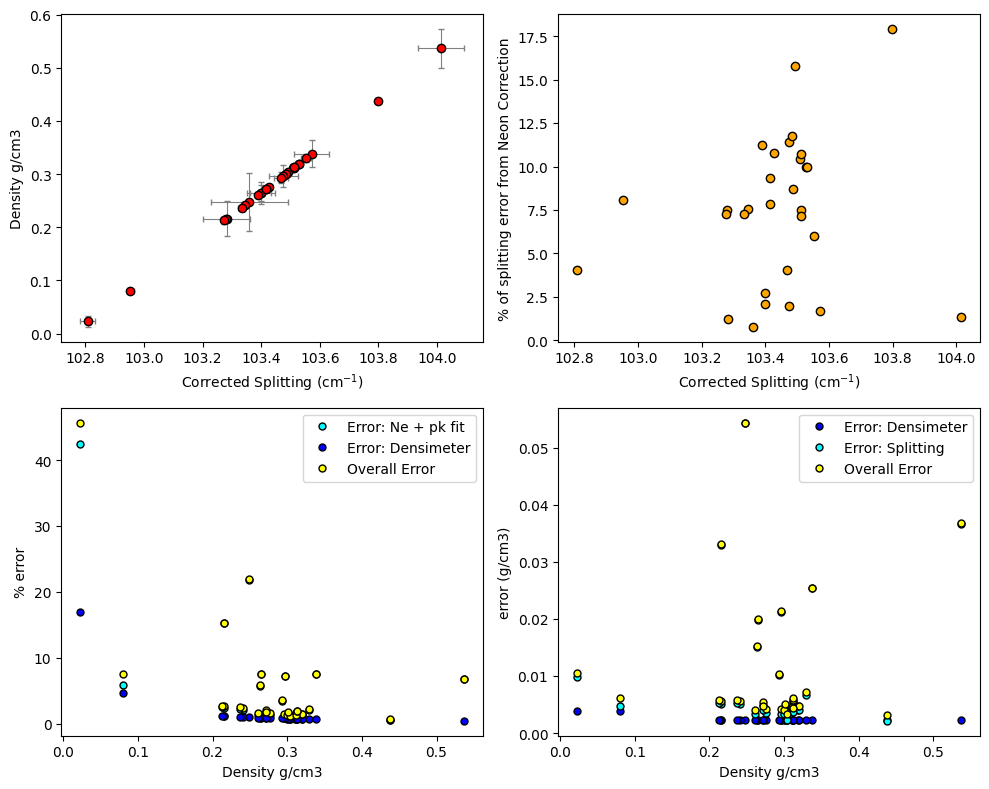

In [63]:
df=sorted_df
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=df.loc[df['Density g/cm3']>0]
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

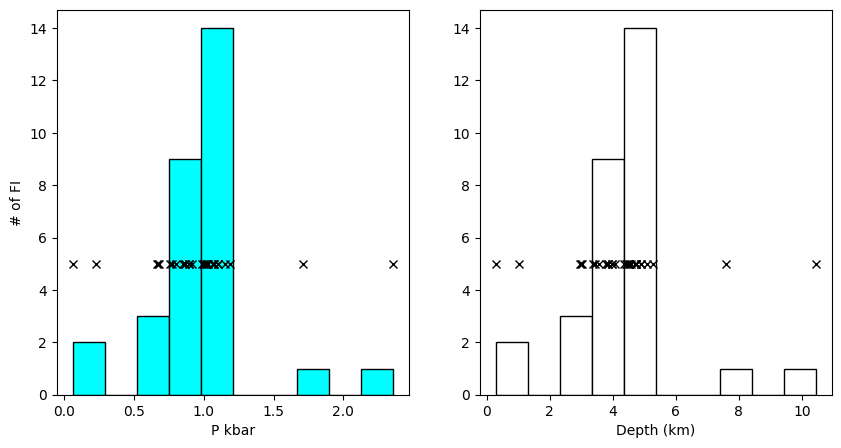

In [64]:
# Calculate pressure with a temperature estimate
Temp_C=1150
Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')